<a href="https://colab.research.google.com/github/DeepthiR2405/bitcoin-sentiment-analysis/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import files

uploaded = files.upload()


Saving historical_data.csv to historical_data (1).csv


In [5]:
from google.colab import files

uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv


In [47]:
import pandas as pd

trader_df = pd.read_csv('historical_data.csv')

sentiment_df = pd.read_csv('fear_greed_index.csv')

print("Trader Data:")
print(trader_df.head())
print("\nSentiment Data:")
print(sentiment_df.head())

Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [48]:
print(trader_df.info())
print(sentiment_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [49]:
print("Trader Columns:", trader_df.columns.tolist())
print("Sentiment Columns:", sentiment_df.columns.tolist())

Trader Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Columns: ['timestamp', 'value', 'classification', 'date']


In [50]:
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])

In [51]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
trader_df['trade_date'] = trader_df['time'].dt.date
sentiment_df['sentiment_date'] = sentiment_df['Date'].dt.date

In [52]:
merged_df = pd.merge(
    trader_df,
    sentiment_df[['sentiment_date', 'classification']],
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)

merged_df.rename(columns={'classification': 'sentiment'}, inplace=True)

In [53]:
merged_df.groupby('sentiment')['Closed PnL'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


In [23]:
import os
os.makedirs('ds_tina/outputs', exist_ok=True)

# Exploring Profitability vs Sentiment


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (10, 6)

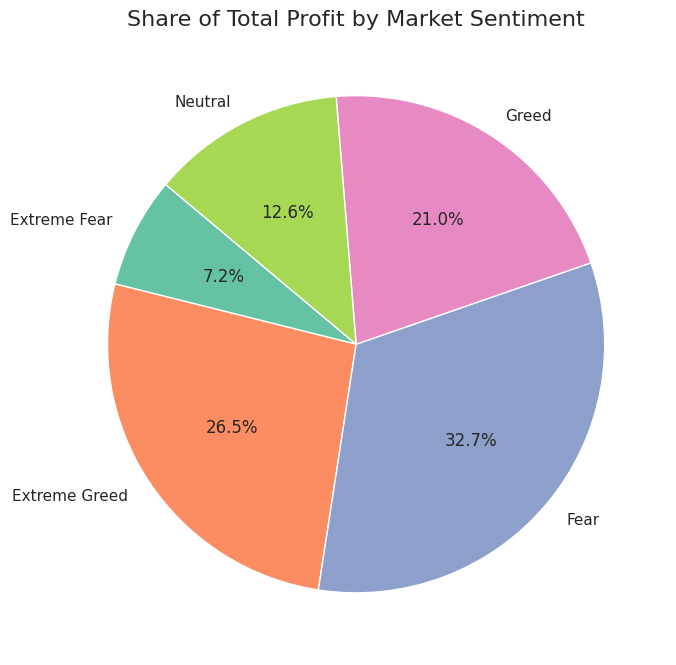

In [55]:
profit_sum = merged_df.groupby('sentiment')['Closed PnL'].sum()

plt.figure(figsize=(7, 7))
colors = sns.color_palette("Set2")

plt.pie(profit_sum, labels=profit_sum.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Share of Total Profit by Market Sentiment', fontsize=16)
plt.tight_layout()
plt.savefig('ds_tina/outputs/pie_profit_by_sentiment.png')
plt.show()

# Exploring Volume vs Sentiment


In [25]:
merged_df.groupby('sentiment')['Size USD'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Extreme Fear,21400.0,5349.731843,22306.826180,0.01,282.4825,766.150,2329.9700,1120971.60
Extreme Greed,39992.0,3112.251565,11061.998403,0.00,106.7575,500.050,1882.8375,665771.71
Fear,61837.0,7816.109931,51914.859249,0.00,235.6300,735.960,2499.9700,3921430.72
Greed,50303.0,5736.884375,30533.418602,0.00,184.1300,555.000,2100.7000,2227114.71
Neutral,37686.0,4782.732661,37461.883466,0.01,175.5400,547.655,1994.2050,3641180.84


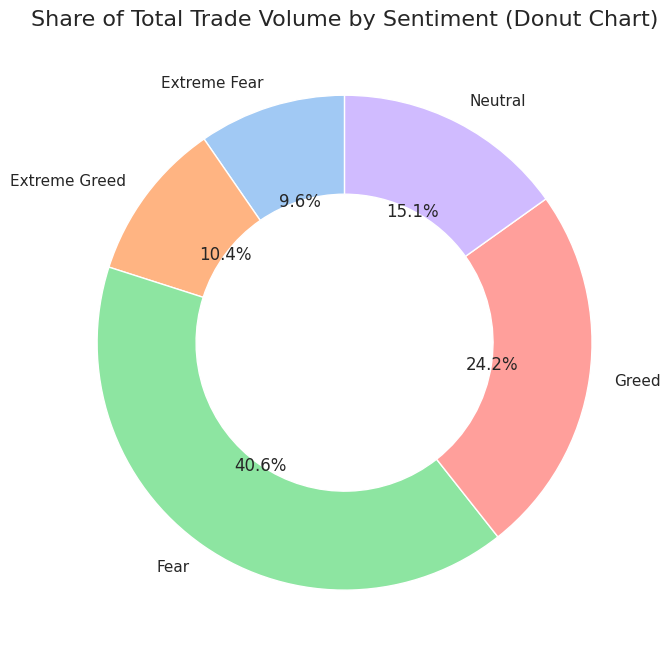

In [56]:
volume_sum = merged_df.groupby('sentiment')['Size USD'].sum()

plt.figure(figsize=(7, 7))
colors = sns.color_palette("pastel")

plt.pie(volume_sum, labels=volume_sum.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
plt.title('Share of Total Trade Volume by Sentiment (Donut Chart)', fontsize=16)
plt.tight_layout()
plt.savefig('ds_tina/outputs/donut_volume_by_sentiment.png')
plt.show()

# Count of Trades

In [27]:
merged_df['sentiment'].value_counts()

,count
sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


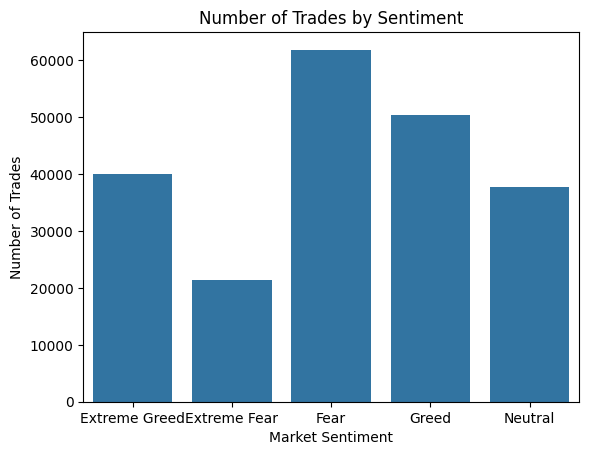

In [28]:
sns.countplot(x='sentiment', data=merged_df)
plt.title('Number of Trades by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.savefig('ds_tina/outputs/trade_count_by_sentiment.png')
plt.show()

# Side vs Sentiment (Long vs Short behavior)

In [29]:
side_sentiment = merged_df.groupby(['sentiment', 'Side']).size().unstack().fillna(0)
print(side_sentiment)

Side             BUY   SELL
sentiment                  
Extreme Fear   10935  10465
Extreme Greed  17940  22052
Fear           30270  31567
Greed          24576  25727
Neutral        18969  18717


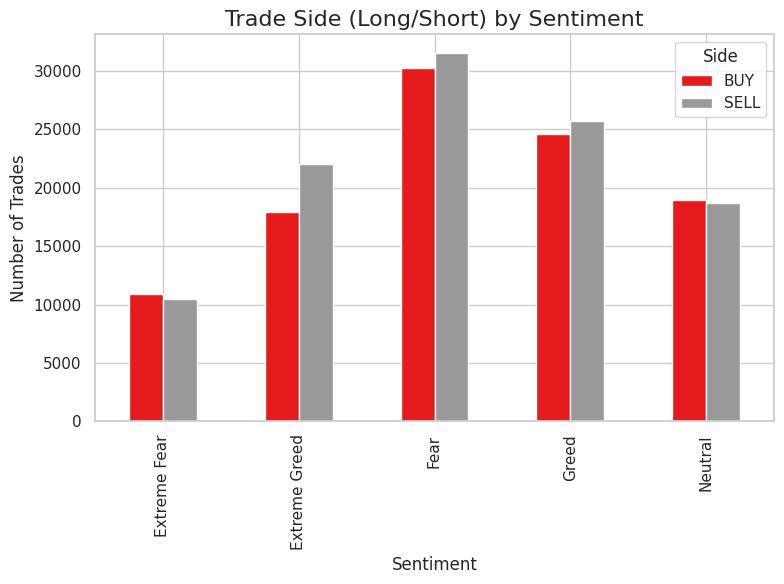

In [57]:
side_sentiment = merged_df.groupby(['sentiment', 'Side']).size().unstack().fillna(0)
side_sentiment.plot(kind='bar', stacked=False, colormap='Set1', figsize=(8, 6))

plt.title('Trade Side (Long/Short) by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Trades', fontsize=12)
plt.legend(title='Side')
plt.tight_layout()
plt.savefig('ds_tina/outputs/side_vs_sentiment.png')
plt.show()

# Profitability Distribution by Side

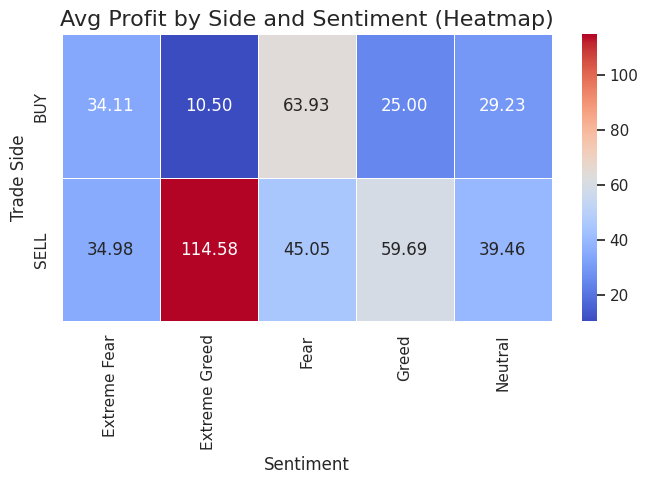

In [58]:
heatmap_data = merged_df.pivot_table(index='Side', columns='sentiment', values='Closed PnL', aggfunc='mean')

plt.figure(figsize=(7, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Avg Profit by Side and Sentiment (Heatmap)", fontsize=16)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Trade Side", fontsize=12)
plt.tight_layout()
plt.savefig('ds_tina/outputs/heatmap_profit_by_side_and_sentiment.png')
plt.show()

#Cleaned Data

In [33]:
merged_df.to_csv('merged_data.csv', index=False)